### The Parable of the Bookmaker

- **Setup**: A bookmaker analyzes a two-horse race.
  - Horse A: 25% chance of winning  
  - Horse B: 75% chance of winning  
  - Sets fair odds: 3:1 against A, 3:1 on B

- **Bets Placed**:
  - $5,000 on Horse A  
  - $10,000 on Horse B

- **Outcomes**:
  - If A wins: **Loss of $5,000**  
  - If B wins: **Profit of $1,667**  
  - **Expected profit**:  

    $$ 0.25 \times (-\$5,000) + 0.75 \times (+\$1,667) = \$0 $$

- **Problem**:
  - Fair odds → zero expected profit in the long run  
  - Still exposes the bookmaker to **short-term risk**

- **Alternative Strategy**:
  - Instead of using true probabilities, the bookmaker sets odds based on **betting volumes** (i.e., supply and demand).
    - $5,000 on A vs. $10,000 on B → implies odds of **2:1 against A** and **2:1 on B**
  - Now, regardless of the outcome:
    - **If A wins**: pay out $10,000, receive $10,000 → **no profit/loss**
    - **If B wins**: pay out $5,000, receive $5,000 → **no profit/loss**
  - Result: a **perfect hedge** — the bookmaker is fully neutral to the outcome


- **Conclusion**:
  - Pricing based on expected values (true probabilities) introduces risk  
  - **Pricing based on hedging** (market flows) removes risk  
  - Bookmaker becomes **fully hedged**, indifferent to outcome

### Calculation with true probabilities

In [21]:
# True Probabilities
true_probs = {'Horse A': 0.25, 'Horse B': 0.75}

# Fair Odds Calculation
fair_odds = {
    'Horse A': (1 / true_probs['Horse A']) - 1,  # 3.0
    'Horse B': (1 / true_probs['Horse B']) - 1   # ~0.33
}

# Bets Placed
bets = {'Horse A': 5000, 'Horse B': 10000}

# Total amount collected
total_bets = sum(bets.values())

# Profit if Horse A Wins
total_payout_if_A_wins = bets['Horse A'] * (1 + fair_odds['Horse A'])  # include stake
profit_if_A_wins = total_bets - total_payout_if_A_wins
print(f"Profit if Horse A wins: ${profit_if_A_wins:,.0f}")

# Profit if Horse B Wins
total_payout_if_B_wins = bets['Horse B'] * (1 + fair_odds['Horse B'])  # include stake
profit_if_B_wins = total_bets - total_payout_if_B_wins
print(f"Profit if Horse B wins: ${profit_if_B_wins:,.0f}")

# Expected value of profit - only true in the long run
expected_profit = (true_probs['Horse A'] * profit_if_A_wins) + (true_probs['Horse B'] * profit_if_B_wins)
print(f"Expected profit: ${expected_profit:,.0f}")

Profit if Horse A wins: $-5,000
Profit if Horse B wins: $1,667
Expected profit: $0


### Calculation with implied(hedged) probabilities

In [ ]:
# True Probabilities
true_probs = {'Horse A': 0.25, 'Horse B': 0.75}

# Bets Placed
bets = {'Horse A': 5000, 'Horse B': 10000}
total_bets = sum(bets.values())

# Hedged Probabilities (based on money wagered)
# ------------------------------------------------
# This calculates the implied probability of each horse winning,
# based on how much money is bet on each one (not their real chance of winning).
# For example, if 1/3 of total money is bet on Horse A, its implied probability is 1/3.
hedged_probs = {
    h: bets[h] / total_bets   # implied_prob = money_on_horse / total_money_bet
    for h in bets
}

# Hedging Odds Calculation (from implied probabilities)
# ------------------------------------------------------
# Converts each implied probability into betting odds using the formula:
#     odds = (1 / probability) - 1
# These odds ensure that no matter who wins, the bookmaker pays out 
# just enough to match the total bets taken — achieving a perfect hedge.
hedged_odds = {
    h: (1 / hedged_probs[h]) - 1   # decimal odds = (1 / prob) - 1
    for h in hedged_probs
}

# Profit if Horse A Wins (hedged)
total_payout_if_A_wins_hedged = bets['Horse A'] * (1 + hedged_odds['Horse A'])  # include stake
profit_if_A_wins_hedged = total_bets - total_payout_if_A_wins_hedged
print(f"Profit if Horse A wins (hedged): ${profit_if_A_wins_hedged:,.0f}")

# Profit if Horse B Wins (hedged)
total_payout_if_B_wins_hedged = bets['Horse B'] * (1 + hedged_odds['Horse B'])  # include stake
profit_if_B_wins_hedged = total_bets - total_payout_if_B_wins_hedged
print(f"Profit if Horse B wins (hedged): ${profit_if_B_wins_hedged:,.0f}")

# Expected profit under true probabilities, using hedged odds
expected_profit_hedged = (
    true_probs['Horse A'] * profit_if_A_wins_hedged +
    true_probs['Horse B'] * profit_if_B_wins_hedged
)
print(f"Expected profit under true probabilities (hedged odds): ${expected_profit_hedged:,.0f}")


Profit if Horse A wins (hedged): $0
Profit if Horse B wins (hedged): $0
Expected profit under true probabilities (hedged odds): $0


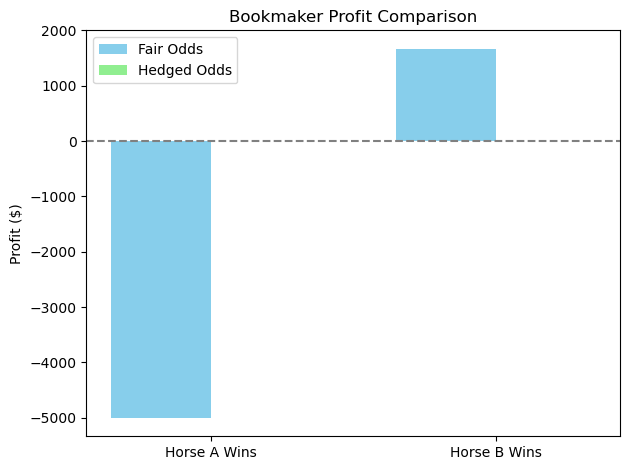

In [25]:
import matplotlib.pyplot as plt

labels = ['Horse A Wins', 'Horse B Wins']
fair_profits = [profit_if_A_wins, profit_if_B_wins]
hedged_profits = [profit_if_A_wins_hedged, profit_if_B_wins_hedged]

x = range(len(labels))
width = 0.35

plt.bar(x, fair_profits, width, label='Fair Odds', color='skyblue')
plt.bar([i + width for i in x], hedged_profits, width, label='Hedged Odds', color='lightgreen')

plt.xticks([i + width / 2 for i in x], labels)
plt.ylabel("Profit ($)")
plt.title("Bookmaker Profit Comparison")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()